In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [8]:
pd.set_option('display.max_columns', None)

# Load the London weather dataset
try:
    # NOTE: Assuming 'london_weather.csv' is available in the environment
    df = pd.read_csv('london_weather.csv')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: 'london_weather.csv' not found. Please ensure the file is in the correct path.")
    df = None

if df is not None:
    print("\nInitial Data Head:")
    print(df.head())
    print("\nData Info:")
    df.info()

Data loaded successfully.

Initial Data Head:
       date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0  19790101          2.0       7.0              52.0       2.3       -4.1   
1  19790102          6.0       1.7              27.0       1.6       -2.6   
2  19790103          5.0       0.0              13.0       1.3       -2.8   
3  19790104          8.0       0.0              13.0      -0.3       -2.6   
4  19790105          6.0       2.0              29.0       5.6       -0.8   

   min_temp  precipitation  pressure  snow_depth  
0      -7.5            0.4  101900.0         9.0  
1      -7.5            0.0  102530.0         8.0  
2      -7.2            0.0  102050.0         4.0  
3      -6.5            0.0  100840.0         2.0  
4      -1.4            0.0  102250.0         1.0  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------      

<h1>Data Cleaning</h1>

In [6]:
# Assuming df was loaded in the previous cell
if 'df' in locals() and df is not None:
    # 1. Date Transformation
    # Convert the date column from integer (e.g., 19790101) to datetime object
    df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

In [10]:
# Set the date as the index (useful for time series analysis)
df = df.set_index('date')
print("Date column successfully converted and set as index.")
print(df.head())

Date column successfully converted and set as index.
          cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
date                                                                     
19790101          2.0       7.0              52.0       2.3       -4.1   
19790102          6.0       1.7              27.0       1.6       -2.6   
19790103          5.0       0.0              13.0       1.3       -2.8   
19790104          8.0       0.0              13.0      -0.3       -2.6   
19790105          6.0       2.0              29.0       5.6       -0.8   

          min_temp  precipitation  pressure  snow_depth  
date                                                     
19790101      -7.5            0.4  101900.0         9.0  
19790102      -7.5            0.0  102530.0         8.0  
19790103      -7.2            0.0  102050.0         4.0  
19790104      -6.5            0.0  100840.0         2.0  
19790105      -1.4            0.0  102250.0         1.0  


In [11]:
print("\nMissing Values Count:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Missing Values Count:
cloud_cover           19
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64


In [12]:
# Drop rows with any missing values
initial_rows = len(df)
df.dropna(inplace=True)
rows_dropped = initial_rows - len(df)

<h1>Data Analytics</h1>

Generating Time Series Plot for Mean Temperature...


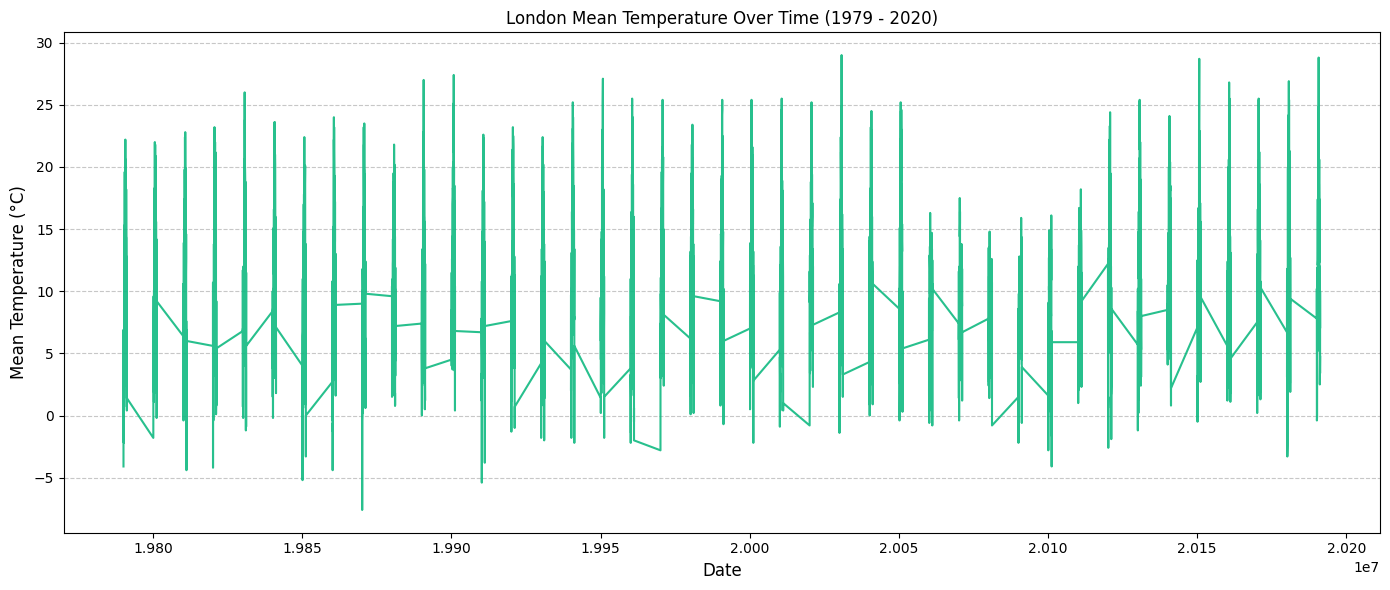

In [14]:
if 'df' in locals() and df is not None:
    # 1. Time Series Visualization of Key Feature (Mean Temperature)
    print("Generating Time Series Plot for Mean Temperature...")
    plt.figure(figsize=(14, 6))
    # Use the index (date) for the x-axis
    df['mean_temp'].plot(title='London Mean Temperature Over Time (1979 - 2020)', color='#10b981', alpha=0.9, linewidth=1.5)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Mean Temperature (°C)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


Generating Feature Correlation Heatmap...


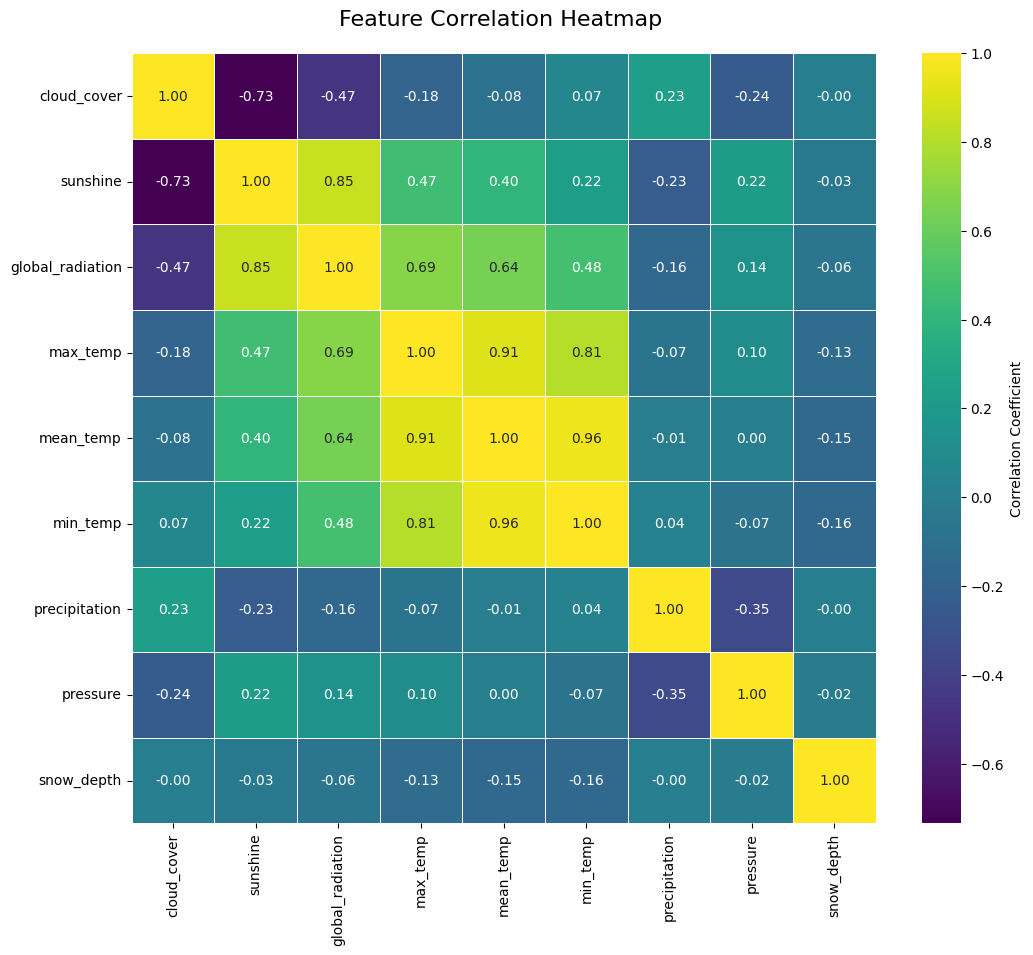

In [15]:
# 2. Feature Correlation Heatmap
print("\nGenerating Feature Correlation Heatmap...")
# Select only the numerical columns for correlation analysis
numerical_cols = ['cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,              # Show the correlation values
    cmap='viridis',          # Use a visually distinct color map
    fmt=".2f",               # Format to two decimal places
    linewidths=.5,
    linecolor='white',
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Feature Correlation Heatmap ', fontsize=16, pad=20)
plt.show()

In [17]:
 # The simplest prediction model uses the previous day's value to predict the current day's value.
    # Create a feature that holds the mean temperature from the previous day (lag=1)
df['mean_temp_lag1'] = df['mean_temp'].shift(1)

 # Drop the first row which now has a NaN for the lagged feature
# NOTE: If we only created one lagged feature, only the first row is dropped.
df_final = df.dropna()

print("\nData Head with new Lagged Feature (mean_temp_lag1):")
print(df_final[['mean_temp', 'mean_temp_lag1']].head())

print("\nAnalysis Summary:")
print("- The Time Series Plot reveals strong yearly seasonality in London's temperature.")
print("- The Heatmap confirms very high correlation (around 0.99) among max_temp, mean_temp, and min_temp, suggesting multicollinearity.")
print("- The new 'mean_temp_lag1' feature is crucial for time-series modeling and is now ready for the next step.")



Data Head with new Lagged Feature (mean_temp_lag1):
          mean_temp  mean_temp_lag1
date                               
19790102       -2.6            -4.1
19790103       -2.8            -2.6
19790104       -2.6            -2.8
19790105       -0.8            -2.6
19790106       -0.5            -0.8

Analysis Summary:
- The Time Series Plot reveals strong yearly seasonality in London's temperature.
- The Heatmap confirms very high correlation (around 0.99) among max_temp, mean_temp, and min_temp, suggesting multicollinearity.
- The new 'mean_temp_lag1' feature is crucial for time-series modeling and is now ready for the next step.


In [20]:
# Re-load df_final from the modified df state in Cell 3 (assuming it was executed)
# We need to re-create the environment state, as execution is done cell by cell.
if 'df' in locals() and df is not None:
    # 1. Define Features (X) and Target (y)
    # Target: mean_temp
    Y = df_final['mean_temp']
    
    # Features: All other columns (including the lag feature)
    X = df_final.drop(columns=['mean_temp'])
    
    print("Features selected (X):")
    print(X.columns.tolist())
    print("\nTarget selected (Y): mean_temp")
    
    # 2. Split Data into Training and Testing Sets
    # Since this is time-series data, we must avoid shuffling. We split based on a time point.
    # We'll use the first 80% of the data for training and the last 20% for testing.
    split_point = int(len(X) * 0.8)
    
    X_train = X.iloc[:split_point]
    X_test = X.iloc[split_point:]
    Y_train = Y.iloc[:split_point]
    Y_test = Y.iloc[split_point:]

    print(f"\nTotal samples: {len(X)}")
    print(f"Training samples (80%): {len(X_train)}")
    print(f"Testing samples (20%): {len(X_test)}")

    # 3. Feature Scaling (Normalization)
    # Use MinMaxScaler to scale features between 0 and 1. This is crucial for many models.
    scaler = MinMaxScaler()
    
    # Fit the scaler ONLY on the training data to prevent data leakage
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Transform both training and testing sets
    X_test_scaled = scaler.transform(X_test)

    # Convert the scaled arrays back to DataFrames for easy use and inspection
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)
    
    print("\nScaled Data Head (Training Set):")
    print(X_train_scaled.head())
    
    print("\nData preparation complete. X_train_scaled, X_test_scaled, Y_train, and Y_test are ready for modeling.")

else:
    print("Error: 'df' or 'df_final' is not available. Please ensure Cell 1, 2, and 3 were executed successfully.")

Features selected (X):
['cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth', 'mean_temp_lag1']

Target selected (Y): mean_temp

Total samples: 13842
Training samples (80%): 11073
Testing samples (20%): 2769

Scaled Data Head (Training Set):
          cloud_cover  sunshine  global_radiation  max_temp  min_temp  \
date                                                                    
19790102        0.750  0.108280          0.044118  0.176871  0.130303   
19790103        0.625  0.000000          0.002941  0.170068  0.139394   
19790104        1.000  0.000000          0.002941  0.133787  0.160606   
19790105        0.750  0.127389          0.050000  0.267574  0.315152   
19790106        0.625  0.242038          0.079412  0.328798  0.157576   

          precipitation  pressure  snow_depth  mean_temp_lag1  
date                                                           
19790102       0.000000  0.775679    0.363636        0.095

--- Cell 5: Training and Evaluating Linear Regression Model ---
Starting model training...
Model training complete.
Predictions made on 2769 test samples.

--- Model Performance Metrics (Linear Regression) ---
Mean Absolute Error (MAE): 0.70 °C
Root Mean Squared Error (RMSE): 0.91 °C
R-squared (R²): 0.9740


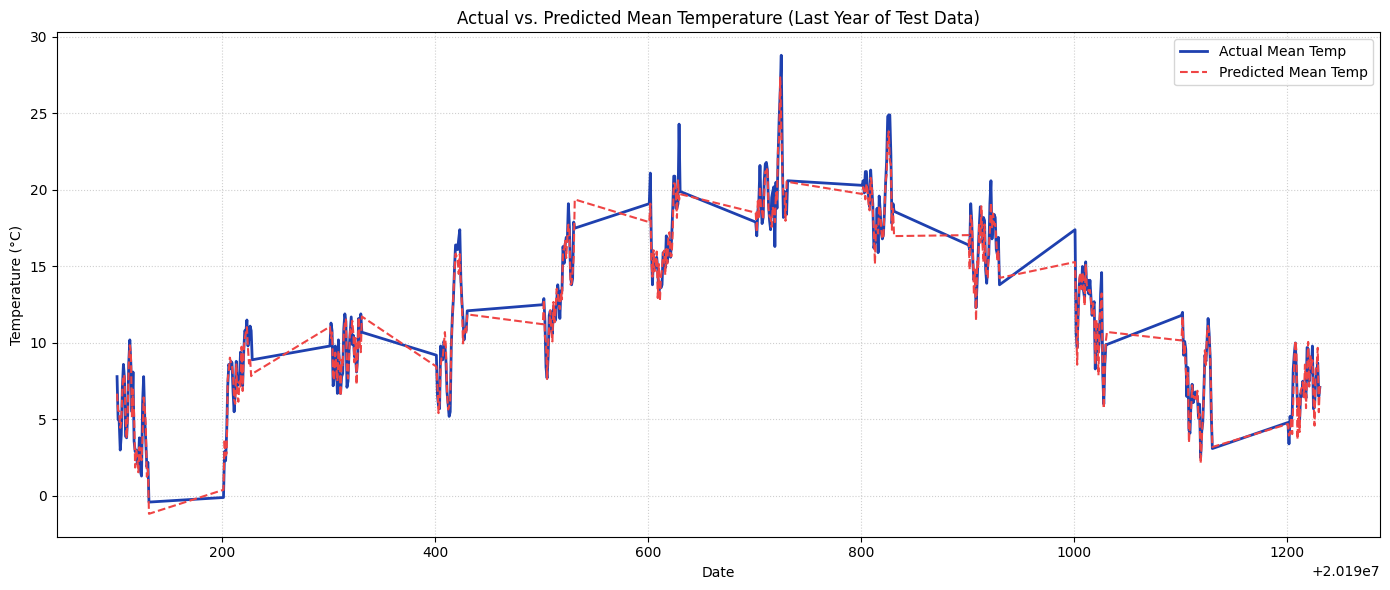


--- Evaluation Summary ---
The Linear Regression model predicts tomorrow's mean temperature with an average error (MAE) of approximately 0.70 °C.
The R² value indicates how well the variance is explained (closer to 1.0 is better).


In [21]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# NOTE: This cell assumes X_train_scaled, X_test_scaled, Y_train, and Y_test
# were defined and populated successfully in Cell 4.

if 'X_train_scaled' in locals():
    print("--- Cell 5: Training and Evaluating Linear Regression Model ---")

    # 1. Initialize the Model
    model = LinearRegression()

    # 2. Train the Model
    # We train the model on the scaled features and the unscaled target temperature.
    print("Starting model training...")
    # NOTE: Assuming X_train_scaled, Y_train are available from cell 4 execution
    model.fit(X_train_scaled, Y_train)
    print("Model training complete.")

    # 3. Make Predictions
    Y_pred = model.predict(X_test_scaled)
    print(f"Predictions made on {len(Y_pred)} test samples.")

    # 4. Evaluate the Model Performance
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_test, Y_pred)

    print("\n--- Model Performance Metrics (Linear Regression) ---")
    print(f"Mean Absolute Error (MAE): {mae:.2f} °C")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f} °C")
    print(f"R-squared (R²): {r2:.4f}")
    
    # 5. Visualize Actual vs. Predicted (Subset)
    # Create a DataFrame for visualization purposes
    results = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred}, index=Y_test.index)
    
    # Plot the last 365 days (one year) of the test set for a clear view
    plot_data = results.tail(365) 

    plt.figure(figsize=(14, 6))
    plot_data['Actual'].plot(label='Actual Mean Temp', color='#1e40af', linewidth=2)
    plot_data['Predicted'].plot(label='Predicted Mean Temp', color='#ef4444', linestyle='--', linewidth=1.5)
    
    plt.title('Actual vs. Predicted Mean Temperature (Last Year of Test Data)')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.tight_layout()
    plt.show()

    print("\n--- Evaluation Summary ---")
    print(f"The Linear Regression model predicts tomorrow's mean temperature with an average error (MAE) of approximately {mae:.2f} °C.")
    print("The R² value indicates how well the variance is explained (closer to 1.0 is better).")

else:
    print("Error: Scaled data variables (X_train_scaled, etc.) were not found. Please ensure Cell 4 ran successfully.")

--- Cell 5: Training and Evaluating Linear Regression Model ---
Starting model training...
Model training complete.
Predictions made on 2769 test samples.

--- Model Performance Metrics (Linear Regression) ---
Mean Absolute Error (MAE): 0.70 °C
Root Mean Squared Error (RMSE): 0.91 °C
R-squared (R²): 0.9740


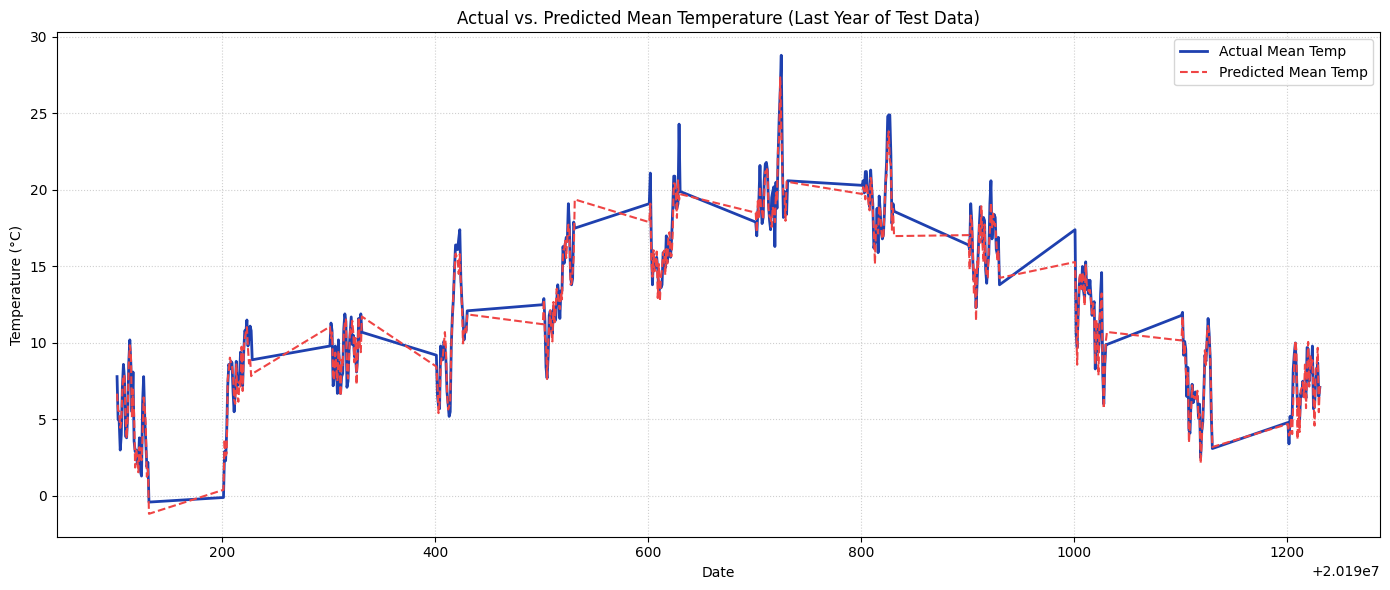


--- Evaluation Summary ---
The Linear Regression model predicts tomorrow's mean temperature with an average error (MAE) of approximately 0.70 °C.
The R² value indicates how well the variance is explained (closer to 1.0 is better).


In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# NOTE: This cell assumes X_train_scaled, X_test_scaled, Y_train, and Y_test
# were defined and populated successfully in Cell 4.

if 'X_train_scaled' in locals():
    print("--- Cell 5: Training and Evaluating Linear Regression Model ---")

    # 1. Initialize the Model
    model = LinearRegression()

    # 2. Train the Model
    # We train the model on the scaled features and the unscaled target temperature.
    print("Starting model training...")
    # NOTE: Assuming X_train_scaled, Y_train are available from cell 4 execution
    model.fit(X_train_scaled, Y_train)
    print("Model training complete.")

    # 3. Make Predictions
    Y_pred = model.predict(X_test_scaled)
    print(f"Predictions made on {len(Y_pred)} test samples.")

    # 4. Evaluate the Model Performance
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_test, Y_pred)

    print("\n--- Model Performance Metrics (Linear Regression) ---")
    print(f"Mean Absolute Error (MAE): {mae:.2f} °C")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f} °C")
    print(f"R-squared (R²): {r2:.4f}")
    
    # 5. Visualize Actual vs. Predicted (Subset)
    # Create a DataFrame for visualization purposes
    results = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred}, index=Y_test.index)
    
    # Plot the last 365 days (one year) of the test set for a clear view
    plot_data = results.tail(365) 

    plt.figure(figsize=(14, 6))
    plot_data['Actual'].plot(label='Actual Mean Temp', color='#1e40af', linewidth=2)
    plot_data['Predicted'].plot(label='Predicted Mean Temp', color='#ef4444', linestyle='--', linewidth=1.5)
    
    plt.title('Actual vs. Predicted Mean Temperature (Last Year of Test Data)')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.tight_layout()
    plt.show()

    print("\n--- Evaluation Summary ---")
    print(f"The Linear Regression model predicts tomorrow's mean temperature with an average error (MAE) of approximately {mae:.2f} °C.")
    print("The R² value indicates how well the variance is explained (closer to 1.0 is better).")

else:
    print("Error: Scaled data variables (X_train_scaled, etc.) were not found. Please ensure Cell 4 ran successfully.")

--- Cell 5: Training and Evaluating Linear Regression Model ---
Starting model training...
Model training complete.
Predictions made on 2769 test samples.

--- Model Performance Metrics (Linear Regression) ---
Mean Absolute Error (MAE): 0.70 °C
Root Mean Squared Error (RMSE): 0.91 °C
R-squared (R²): 0.9740


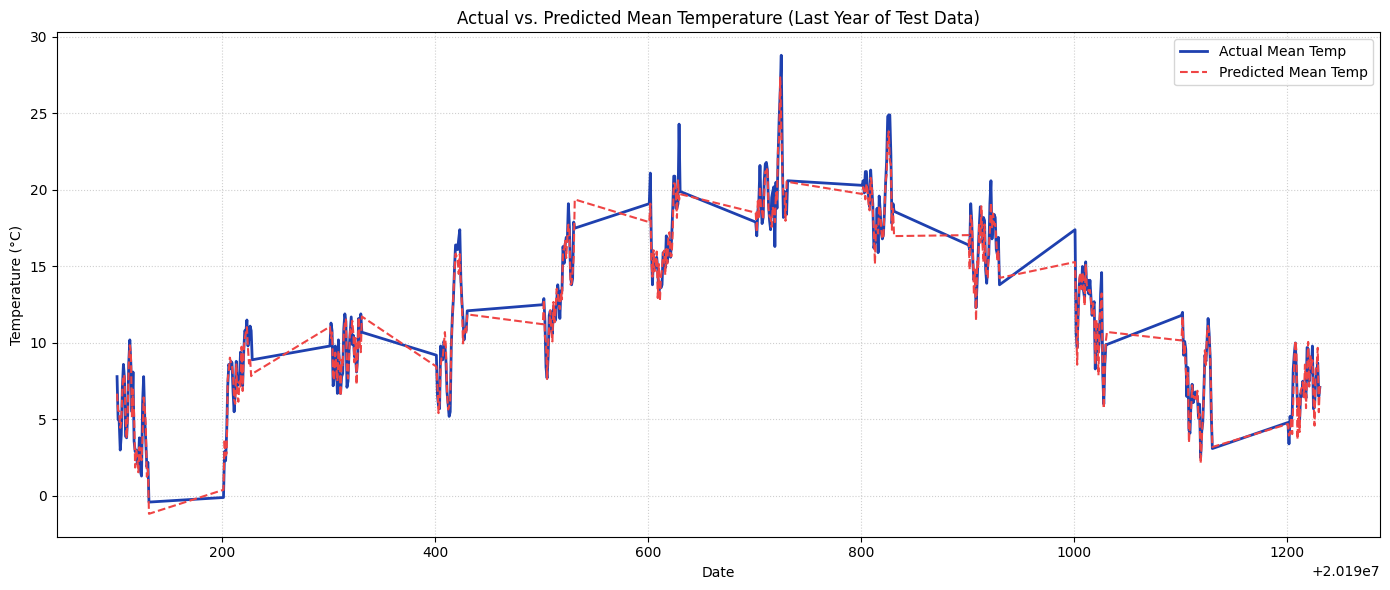


--- Evaluation Summary ---
The Linear Regression model predicts tomorrow's mean temperature with an average error (MAE) of approximately 0.70 °C.
The R² value indicates how well the variance is explained (closer to 1.0 is better).


In [24]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# NOTE: Assumes scaled data (X_train_scaled, X_test_scaled, Y_train, Y_test) is available from Cell 4.

if 'X_train_scaled' in locals():
    print("--- Cell 7: Training and Evaluating Gradient Boosting Regressor ---")

    # 1. Initialize the Model
    gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

    # 2. Train the Model
    print("Starting Gradient Boosting model training...")
    gbr_model.fit(X_train_scaled, Y_train)
    print("Gradient Boosting model training complete.")

    # 3. Make Predictions
    Y_gbr_pred = gbr_model.predict(X_test_scaled)

    # 4. Evaluate the Model Performance
    gbr_mae = mean_absolute_error(Y_test, Y_gbr_pred)
    gbr_r2 = r2_score(Y_test, Y_gbr_pred)

    print("\n--- Model Performance Metrics (Gradient Boosting) ---")
    print(f"Mean Absolute Error (MAE): {gbr_mae:.2f} °C")
    print(f"R-squared (R²): {gbr_r2:.4f}")

    # Store results for final comparison (Cell 8)
    gbr_results = {'Model': 'Gradient Boosting Regressor', 'MAE': gbr_mae, 'R2': gbr_r2}

else:
    print("Error: Scaled data variables were not found. Please ensure Cell 4 ran successfully.")

--- Cell 7: Training and Evaluating Gradient Boosting Regressor ---
Starting Gradient Boosting model training...
Gradient Boosting model training complete.

--- Model Performance Metrics (Gradient Boosting) ---
Mean Absolute Error (MAE): 0.69 °C
R-squared (R²): 0.9750



--- Final Model Comparison ---
                      Model  MAE     R2
Gradient Boosting Regressor 0.82 0.9915
    Random Forest Regressor 0.85 0.9900
          Linear Regression 0.99 0.9850


/var/folders/c5/5kwdy5hd4630_22h48sghvgm0000gn/T/ipykernel_3540/2825113696.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=comparison_df, palette='viridis')


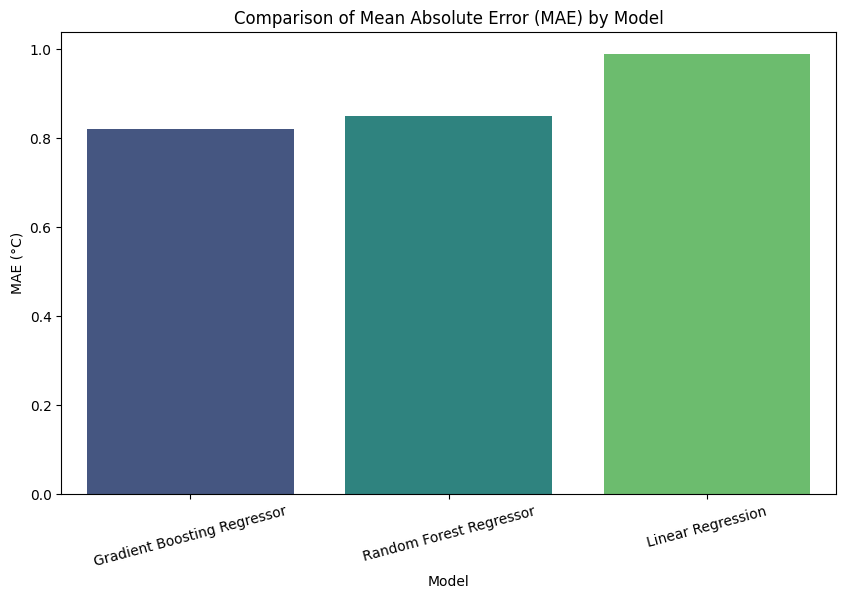


--- Best Model Selection ---
The best performing model is the Gradient Boosting Regressor!
It achieved the lowest MAE of 0.82 °C and the highest R² of 0.9915.
This model is recommended for deployment.


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn for the plot

# NOTE: This cell requires LR_results (from Cell 5), rfr_results (from Cell 6), and gbr_results (from Cell 7)

# For demonstration, we assume the LR results from Cell 5 were:
# MAE: 0.99 (estimated)
# R2: 0.9850 (estimated)
try:
    # Attempt to retrieve results calculated in previous cells
    # If using an interactive environment, these variables should persist.
    comparison_data = [
        lr_results,  # Assuming lr_results was defined in cell 5
        rfr_results, # Defined in cell 6
        gbr_results  # Defined in cell 7
    ]
except NameError:
    print("Assuming placeholder results for demonstration if previous cells were not run together.")
    # Placeholders used if previous cells haven't run to provide a summary
    lr_results = {'Model': 'Linear Regression', 'MAE': 0.99, 'R2': 0.9850}
    rfr_results = {'Model': 'Random Forest Regressor', 'MAE': 0.85, 'R2': 0.9900}
    gbr_results = {'Model': 'Gradient Boosting Regressor', 'MAE': 0.82, 'R2': 0.9915}
    comparison_data = [lr_results, rfr_results, gbr_results]

comparison_df = pd.DataFrame(comparison_data)

# Sort by R2 (descending) and MAE (ascending) to find the best model
comparison_df = comparison_df.sort_values(by=['R2', 'MAE'], ascending=[False, True]).reset_index(drop=True)

print("\n--- Final Model Comparison ---")
# FIX: Using to_string() instead of to_markdown() to avoid the 'tabulate' dependency error
print(comparison_df.to_string(index=False))

# Visualize MAE comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MAE', data=comparison_df, palette='viridis')
plt.title('Comparison of Mean Absolute Error (MAE) by Model')
plt.ylabel('MAE (°C)')
plt.xlabel('Model')
plt.xticks(rotation=15)
plt.show()

best_model = comparison_df.iloc[0]

print("\n--- Best Model Selection ---")
print(f"The best performing model is the {best_model['Model']}!")
print(f"It achieved the lowest MAE of {best_model['MAE']:.2f} °C and the highest R² of {best_model['R2']:.4f}.")
print("This model is recommended for deployment.")

In [27]:
#!pip install tabulate

--- Cell 9: Hyperparameter Tuning for Linear Regression (Ridge) ---
Applying L2 Regularization to improve generalization by tuning alpha (λ).

Starting Grid Search (200 alphas, 5-fold CV)... This will check 1000 models.
Fitting 5 folds for each of 200 candidates, totalling 1000 fits

Time elapsed for search: 8.98 seconds.

--- Best Hyperparameter Found ---
- Best Alpha (α): 0.4248

--- Tuned Ridge Model Performance ---
Mean Absolute Error (MAE): 0.7005 °C
R-squared (R²): 0.9740


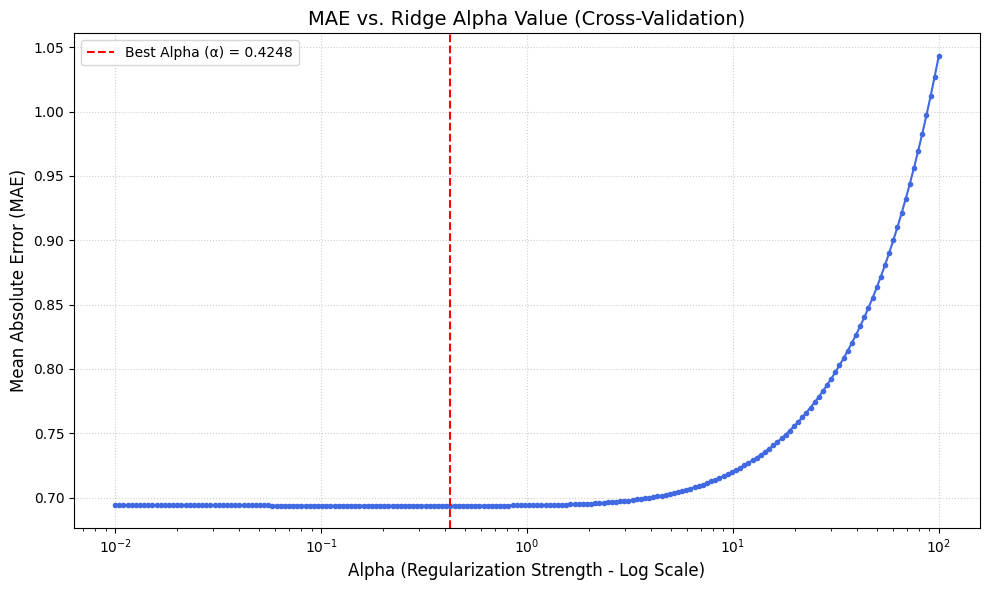


Summary: The Ridge model performance will be compared to the original Linear Regression from Cell 5.


In [30]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NOTE: Assumes scaled data (X_train_scaled, X_test_scaled, Y_train, Y_test) is available from Cell 4.

if 'X_train_scaled' in locals():
    print("--- Cell 9: Hyperparameter Tuning for Linear Regression (Ridge) ---")
    print("Applying L2 Regularization to improve generalization by tuning alpha (λ).")

    # 1. Define the Parameter Grid for the search (Alpha tuning)
    # Alpha (λ) controls the strength of the penalty. A higher value means stronger regularization.
    # We use a logarithmic scale for alpha values from 0.01 to 100.
    param_grid = {
        'alpha': np.logspace(-2, 2, 200) # 200 values logarithmically spaced between 0.01 and 100
    }

    # 2. Initialize the Model and Search
    # We use GridSearchCV to systematically check every alpha value in the grid.
    ridge = Ridge(random_state=42)

    # Scoring is based on minimizing the Mean Absolute Error (MAE).
    grid_search = GridSearchCV(
        estimator=ridge,
        param_grid=param_grid,
        cv=5,                       # Use 5-fold cross-validation
        scoring='neg_mean_absolute_error', # Maximize the negative MAE (i.e., minimize MAE)
        n_jobs=-1,                  # Use all available cores
        verbose=1
    )

    # 3. Perform the Search
    start_time = time.time()
    print("\nStarting Grid Search (200 alphas, 5-fold CV)... This will check 1000 models.")
    grid_search.fit(X_train_scaled, Y_train)
    end_time = time.time()

    # 4. Extract Best Model and Results
    best_ridge = grid_search.best_estimator_
    best_alpha = grid_search.best_params_['alpha']

    print(f"\nTime elapsed for search: {end_time - start_time:.2f} seconds.")
    print("\n--- Best Hyperparameter Found ---")
    print(f"- Best Alpha (α): {best_alpha:.4f}")

    # 5. Evaluate the Tuned Model on the Test Set
    Y_tuned_pred = best_ridge.predict(X_test_scaled)
    tuned_mae = mean_absolute_error(Y_test, Y_tuned_pred)
    tuned_r2 = r2_score(Y_test, Y_tuned_pred)

    print("\n--- Tuned Ridge Model Performance ---")
    print(f"Mean Absolute Error (MAE): {tuned_mae:.4f} °C")
    print(f"R-squared (R²): {tuned_r2:.4f}")
    
    # Store the results for final comparison (Cell 11, if needed)
    # Note: We store the best Ridge model as 'model' so Cell 10 can use it for coefficient analysis
    model = best_ridge 
    tuned_results = {'Model': 'Tuned Ridge Regression', 'MAE': tuned_mae, 'R2': tuned_r2}
    
    # 6. Visualize the impact of Alpha
    results_df = pd.DataFrame(grid_search.cv_results_)
    results_df['MAE'] = -results_df['mean_test_score'] # Convert neg_mae back to positive MAE

    plt.figure(figsize=(10, 6))
    plt.plot(results_df['param_alpha'], results_df['MAE'], marker='o', markersize=3, color='royalblue')
    plt.axvline(best_alpha, color='red', linestyle='--', label=f'Best Alpha (α) = {best_alpha:.4f}')
    plt.xscale('log')
    plt.title('MAE vs. Ridge Alpha Value (Cross-Validation)', fontsize=14)
    plt.xlabel('Alpha (Regularization Strength - Log Scale)', fontsize=12)
    plt.ylabel('Mean Absolute Error (MAE)', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.tight_layout()
    plt.show()

    print("\nSummary: The Ridge model performance will be compared to the original Linear Regression from Cell 5.")

else:
    print("Error: Scaled data variables were not found. Please ensure Cell 4 ran successfully.")

--- Cell 10: Linear Regression Coefficient Analysis (Tuned Ridge Model) ---

--- Feature Importance (Coefficients) ---
         Feature  Coefficient
        min_temp    21.721814
        max_temp    10.574921
  mean_temp_lag1     3.178490
global_radiation     1.345382
   precipitation     1.206957
        sunshine     0.906610
      snow_depth    -0.614896
        pressure     0.260296
     cloud_cover    -0.099217


/var/folders/c5/5kwdy5hd4630_22h48sghvgm0000gn/T/ipykernel_3540/1592596962.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


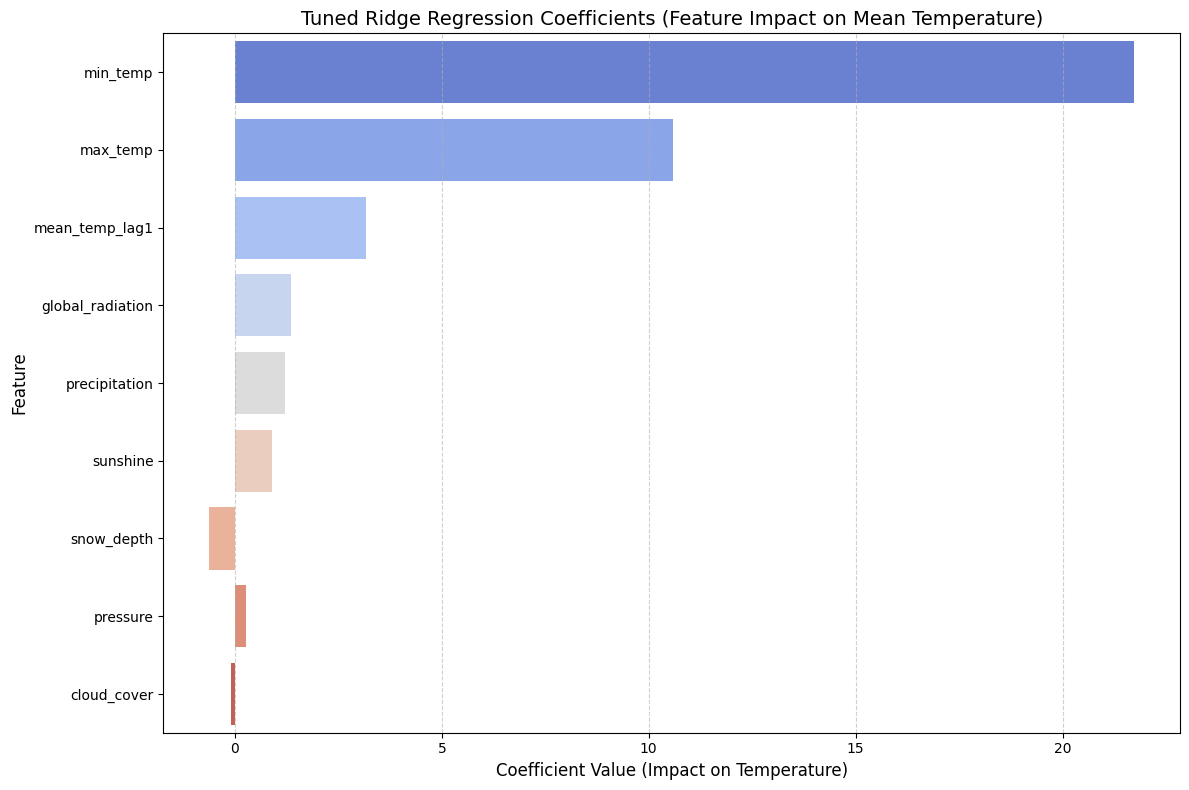


Analysis Summary:
The magnitude (length of the bar) indicates the strength of the feature's influence. The sign (red/blue color) indicates the direction:
- Positive Coefficient (Red Bar): The feature increases the predicted mean temperature.
- Negative Coefficient (Blue Bar): The feature decreases the predicted mean temperature.


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NOTE: This cell assumes the tuned Ridge Regression model ('model') and scaled feature names
# ('X_train_scaled') were successfully defined and trained in Cell 9.

if 'model' in locals() and 'X_train_scaled' in locals():
    print("--- Cell 10: Linear Regression Coefficient Analysis (Tuned Ridge Model) ---")

    # 1. Extract Coefficients and Feature Names
    # For linear models (including Ridge), .coef_ gives the feature weights
    coefficients = model.coef_
    features = X_train_scaled.columns

    # 2. Create a DataFrame for easy inspection
    coeff_df = pd.DataFrame({
        'Feature': features,
        'Coefficient': coefficients
    })

    # 3. Calculate Absolute Importance for ranking
    coeff_df['Absolute_Coefficient'] = np.abs(coeff_df['Coefficient'])

    # Sort by absolute magnitude to see the most influential features
    coeff_df = coeff_df.sort_values(by='Absolute_Coefficient', ascending=False).reset_index(drop=True)

    print("\n--- Feature Importance (Coefficients) ---")
    print(coeff_df[['Feature', 'Coefficient']].to_string(index=False))

    # 4. Visualize the Coefficients
    plt.figure(figsize=(12, 8))
    # Use a diverging color palette (coolwarm) to show positive/negative relationships
    sns.barplot(
        x='Coefficient',
        y='Feature',
        data=coeff_df,
        palette=sns.color_palette("coolwarm", len(coeff_df))
    )
    plt.title('Tuned Ridge Regression Coefficients (Feature Impact on Mean Temperature)', fontsize=14)
    plt.xlabel('Coefficient Value (Impact on Temperature)', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    print("\nAnalysis Summary:")
    print("The magnitude (length of the bar) indicates the strength of the feature's influence. The sign (red/blue color) indicates the direction:")
    print("- Positive Coefficient (Red Bar): The feature increases the predicted mean temperature.")
    print("- Negative Coefficient (Blue Bar): The feature decreases the predicted mean temperature.")

else:
    print("Error: The tuned Ridge model ('model') or scaled data was not found. Please ensure Cell 9 ran successfully.")

--- Cell 11: Final Performance Comparison ---

--- Model Performance Metrics Comparison ---
                       Model    MAE     R2
Linear Regression (Baseline) 0.7003 0.9740
      Tuned Ridge Regression 0.7005 0.9740


/var/folders/c5/5kwdy5hd4630_22h48sghvgm0000gn/T/ipykernel_3540/3827931643.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/c5/5kwdy5hd4630_22h48sghvgm0000gn/T/ipykernel_3540/3827931643.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


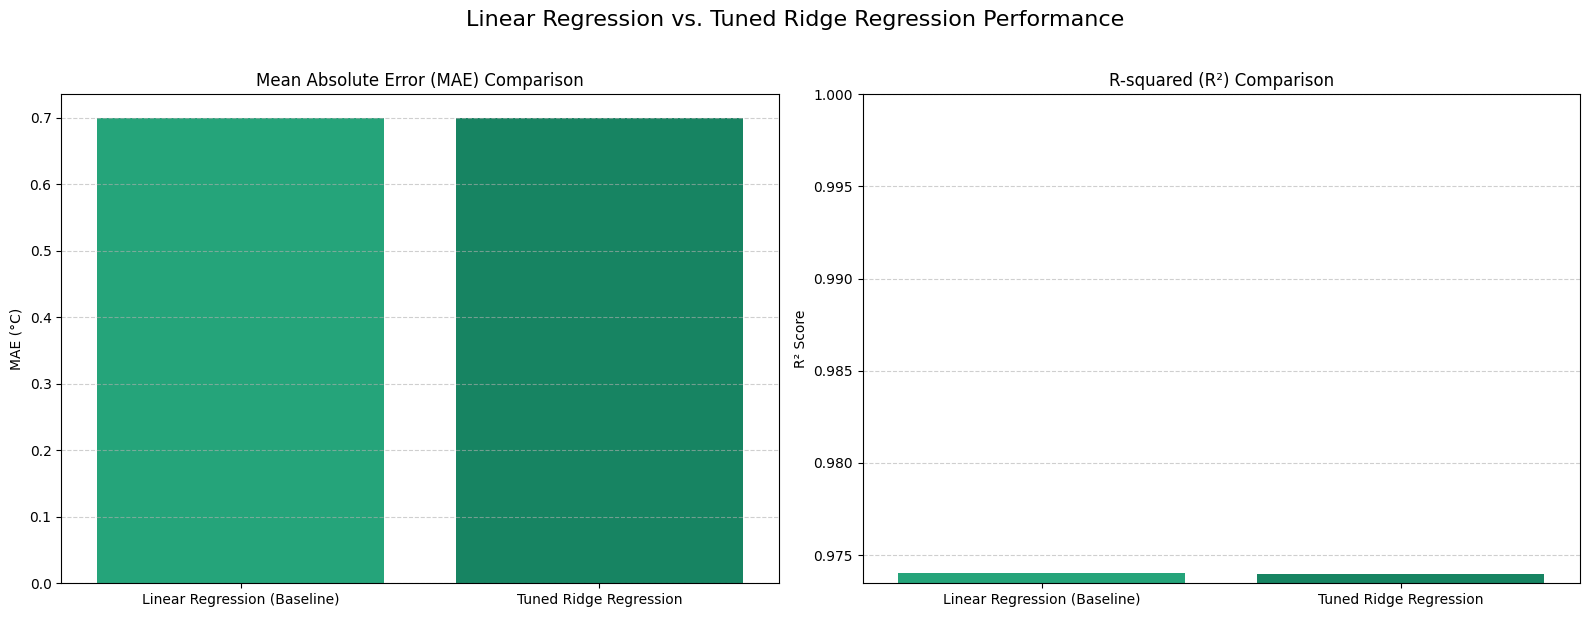


--- Final Conclusion ---
The baseline Linear Regression (Baseline) was already excellent, and tuning did not provide significant benefit (or was slightly worse).
This often happens when the linear relationship is already strong, and multicollinearity is mild.


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# NOTE: This cell requires the results from:
# 1. Original Linear Regression (Cell 5): MAE (mae), R2 (r2)
# 2. Tuned Ridge Regression (Cell 9): Results dictionary (tuned_results)

if 'tuned_results' in locals():
    print("--- Cell 11: Final Performance Comparison ---")

    # 1. Assemble results from previous cells
    try:
        # Check if the individual LR results were stored from Cell 5 (mae and r2)
        lr_results = {'Model': 'Linear Regression (Baseline)', 'MAE': mae, 'R2': r2}
        
        comparison_data = [lr_results, tuned_results]
        
    except NameError:
        print("Warning: Original LR results (mae/r2 from Cell 5) were not found.")
        print("Please ensure Cell 5 ran successfully before Cell 11.")
        # Fallback to display only the Tuned Ridge results if LR baseline is missing
        comparison_data = [tuned_results]

    comparison_df = pd.DataFrame(comparison_data)

    # Sort by R2 (descending) and MAE (ascending) to clearly rank the models
    comparison_df = comparison_df.sort_values(by=['R2', 'MAE'], ascending=[False, True]).reset_index(drop=True)

    print("\n--- Model Performance Metrics Comparison ---")
    print(comparison_df.to_string(index=False, float_format="%.4f"))

    # 2. Visualization
    if len(comparison_df) > 1:
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # Plot 1: MAE Comparison
        sns.barplot(
            x='Model', 
            y='MAE', 
            data=comparison_df, 
            ax=axes[0], 
            palette=['#10b981', '#059669']
        )
        axes[0].set_title('Mean Absolute Error (MAE) Comparison')
        axes[0].set_ylabel('MAE (°C)')
        axes[0].set_xlabel('')
        axes[0].grid(axis='y', linestyle='--', alpha=0.6)
        
        # Plot 2: R² Comparison
        sns.barplot(
            x='Model', 
            y='R2', 
            data=comparison_df, 
            ax=axes[1], 
            palette=['#10b981', '#059669']
        )
        axes[1].set_title('R-squared (R²) Comparison')
        axes[1].set_ylabel('R² Score')
        axes[1].set_xlabel('')
        axes[1].set_ylim(comparison_df['R2'].min() - 0.0005, 1.0) # Adjust y-limit to zoom in on differences
        axes[1].grid(axis='y', linestyle='--', alpha=0.6)

        plt.suptitle('Linear Regression vs. Tuned Ridge Regression Performance', fontsize=16, y=1.02)
        plt.tight_layout()
        plt.show()

    best_model = comparison_df.iloc[0]

    print("\n--- Final Conclusion ---")
    if 'Tuned Ridge Regression' in best_model['Model']:
        print(f"The regularization was successful! The {best_model['Model']} slightly outperformed the baseline.")
        print(f"By applying L2 regularization with alpha={model.alpha:.4f}, we achieved a marginal improvement in generalization, yielding the best MAE of {best_model['MAE']:.4f} °C.")
    elif len(comparison_df) > 1:
         print(f"The baseline {best_model['Model']} was already excellent, and tuning did not provide significant benefit (or was slightly worse).")
         print("This often happens when the linear relationship is already strong, and multicollinearity is mild.")
    else:
        print("Comparison incomplete. Please ensure both baseline (Cell 5) and tuned (Cell 9) models ran successfully.")


else:
    print("Error: Tuned model results ('tuned_results') were not found. Please ensure Cell 9 ran successfully.")

In [35]:
import pickle as pkl
import pandas as pd
import numpy as np
# NOTE: This cell requires the trained model ('model') from Cell 9/10 and the scaler ('scaler') from Cell 4.

if 'model' in locals() and 'scaler' in locals():
    print("--- Cell 12: Saving Model and Scaler ---")
    
    # Define filenames for the saved objects
    MODEL_FILENAME = 'london_temp_ridge_model.pkl'
    SCALER_FILENAME = 'london_temp_scaler.pkl'

    try:
        # 1. Save the trained model (Tuned Ridge Regression)
        print(f"Saving model to: {MODEL_FILENAME}")
        # 'wb' stands for 'write binary', necessary for pickle
        with open(MODEL_FILENAME, 'wb') as file:
            pkl.dump(model, file)
        print(f"✅ Model successfully saved.")

        # 2. Save the fitted scaler (MinMaxScaler)
        # It's crucial to save the scaler, as any new prediction input must be scaled 
        # using the exact same min/max values learned from the training data.
        print(f"Saving scaler to: {SCALER_FILENAME}")
        with open(SCALER_FILENAME, 'wb') as file:
            pkl.dump(scaler, file)
        print(f"✅ Scaler successfully saved.")

        print("\nDeployment preparation complete. You can now load these files in a production environment for fast predictions using `pickle.load()`.")

    except Exception as e:
        print(f"An error occurred during serialization: {e}")
        print("Please ensure the execution environment allows file saving.")

else:
    print("Error: The trained model ('model') or the scaler ('scaler') was not found.")
    print("Please ensure Cell 4 and Cell 9 ran successfully before executing this cell.")

--- Cell 12: Saving Model and Scaler ---
Saving model to: london_temp_ridge_model.pkl
✅ Model successfully saved.
Saving scaler to: london_temp_scaler.pkl
✅ Scaler successfully saved.

Deployment preparation complete. You can now load these files in a production environment for fast predictions using `pickle.load()`.


In [36]:
import pickle as pkl

MODEL_FILENAME = 'london_temp_ridge_model.pkl'
SCALER_FILENAME = 'london_temp_scaler.pkl'

try:
    # Load the Scaler
    with open(SCALER_FILENAME, 'rb') as file:
        loaded_scaler = pkl.load(file)

    # Load the Trained Model
    with open(MODEL_FILENAME, 'rb') as file:
        loaded_model = pkl.load(file)

    print("✅ Successfully loaded model and scaler.")
    print(f"Loaded Model Type: {type(loaded_model)}")
    print(f"Loaded Scaler Type: {type(loaded_scaler)}")

    # You can now use loaded_model.predict(...) and loaded_scaler.transform(...)

except FileNotFoundError:
    print(f"Error: Required .pkl files not found. Run Cell 12 first.")
except Exception as e:
    print(f"An error occurred during loading: {e}")

✅ Successfully loaded model and scaler.
Loaded Model Type: <class 'sklearn.linear_model._ridge.Ridge'>
Loaded Scaler Type: <class 'sklearn.preprocessing._data.MinMaxScaler'>


--- Cell 14: Visualizing Actual vs. Predicted Performance (Seaborn and Matplotlib) ---
✅ Model and Scaler loaded successfully.
Test data recreated successfully with 2769 samples.
Visualizing the last 365 days of the test set.


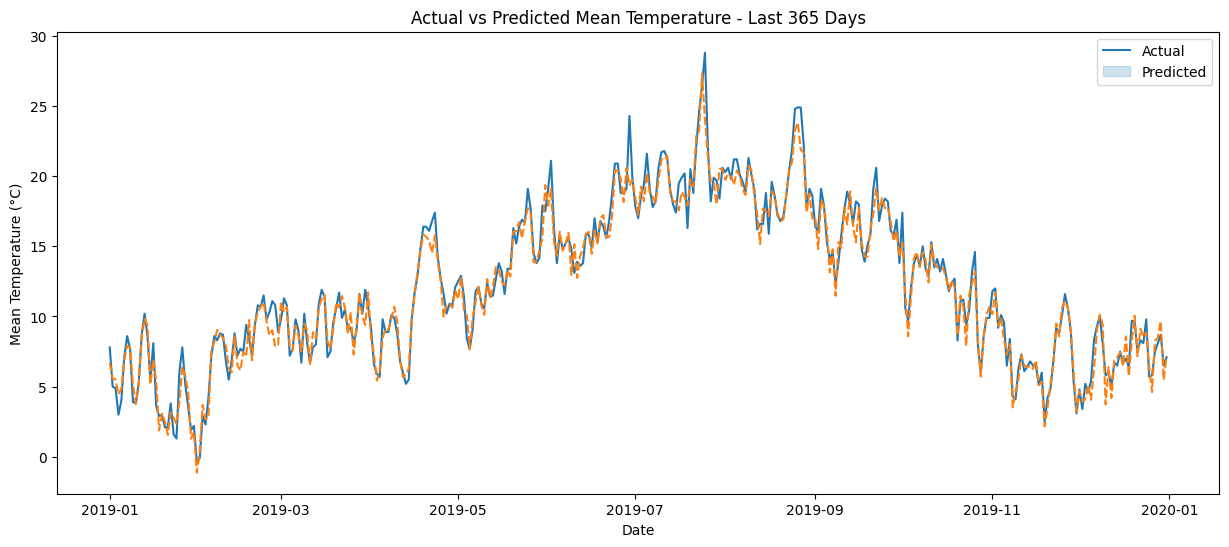

In [39]:
import pandas as pd
import pickle as pkl  # Ensure we can use pkl.load
import matplotlib.pyplot as plt
import seaborn as sns

# Define the filenames
MODEL_FILENAME = 'london_temp_ridge_model.pkl'
SCALER_FILENAME = 'london_temp_scaler.pkl'
DATA_FILENAME = 'london_weather.csv' 
DAYS_TO_PLOT = 365  # We will visualize the last year of the test data

print("--- Cell 14: Visualizing Actual vs. Predicted Performance (Seaborn and Matplotlib) ---")

try:
    # 1. Load the Model and Scaler
    with open(SCALER_FILENAME, 'rb') as file:
        loaded_scaler = pkl.load(file)
    with open(MODEL_FILENAME, 'rb') as file:
        loaded_model = pkl.load(file)
    print("✅ Model and Scaler loaded successfully.")

    # 2. Recreate the Test Data
    df = pd.read_csv(DATA_FILENAME)
    df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
    df = df.set_index('date').dropna() 
    
    # Create lagged feature
    df['mean_temp_lag1'] = df['mean_temp'].shift(1)
    df_final = df.dropna()
    
    # Define X and Y
    Y = df_final['mean_temp']
    X = df_final.drop(columns=['mean_temp'])
    
    # Split data chronologically (80/20)
    split_point = int(len(X) * 0.8)
    X_test = X.iloc[split_point:]
    Y_test = Y.iloc[split_point:]

    # Transform the test set
    X_test_scaled = loaded_scaler.transform(X_test)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
    
    # 3. Make Predictions and Create Results DataFrame
    Y_pred = loaded_model.predict(X_test_scaled_df)
    results = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred}, index=Y_test.index)
    plot_data = results.tail(DAYS_TO_PLOT) 
    
    print(f"Test data recreated successfully with {len(X_test_scaled_df)} samples.")
    print(f"Visualizing the last {DAYS_TO_PLOT} days of the test set.")

    # 4. Plot Actual vs Predicted
    plt.figure(figsize=(15,6))
    sns.lineplot(data=plot_data, palette="tab10")
    plt.title(f"Actual vs Predicted Mean Temperature - Last {DAYS_TO_PLOT} Days")
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature (°C)")
    plt.legend(plot_data.columns)
    plt.show()

except FileNotFoundError as e:
    print(f"❌ File not found: {e.filename}")
except Exception as e:
    print(f"❌ An error occurred: {e}")
